# Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This datasource is from [Kaggle-TMDb Dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). This data set contains information 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Analysis aims to discover following questions:**
- Which year has the highest release of movies?
- Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?
- Movie with Highest And Lowest Budget? 
- Which movie made the highest revenue and lowest as well?
- Movie with shorest and longest runtime?
- Which movie get the highest or lowest votes (Ratings).
- Which Year Has The Highest Profit Rate?
- Which length movies most liked by the audiences according to their popularity?
- Average Runtime Of Movies From Year To Year?
- How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?
- Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?
- Which genres are most popular from year to year? 
- What kinds of properties are associated with movies that have high revenues?

In [218]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the following tasks are performed: 
- Loading the data 
- Cleaning of dataset for analysis.

### General Properties

In [219]:
# Loading the data.
movies_data = pd.read_csv('D:/tmdb-movies.csv')   

# Printing the info of dataset.
movies_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [220]:
#print first two rows of the dataset
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [221]:
#print Last two rows of the dataset
movies_data.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [222]:
# Stats of the dataset
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [223]:
# Number of null values
movies_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [224]:
movies_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [225]:
# Filling na values with 0
movies_data = movies_data.fillna(0)

### Data Cleaning

- Remove duplicate rows from the dataset
- Change format of release date into datetime format
- Remove the unused colums that are not needes in the analysis process.
- Remove the movies which are having zero value of budget and revenue.

**Remove Duplicate Rows**

In [226]:
# Checking number of duplicate values
sum(movies_data.duplicated())

1

In [227]:
# Removing duplicate values
movies_data.drop_duplicates(inplace = True)

**Changing Format Of Release Date Into Datetime Format**

In [228]:
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

**Removing the columns that are not Needed.** 
>- imdb_id 
- homepage
- tagline 
- overview 
- budget_adj  
- revenue_adj

In [229]:
movies_data.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",movies_data.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


**Drop Rows which contains no values.**
> In this database, there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released.

In [230]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",movies_data[(movies_data['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",movies_data[(movies_data['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


<a id='eda'></a>
## Exploratory Data Analysis

### Which year has the highest release of movies?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


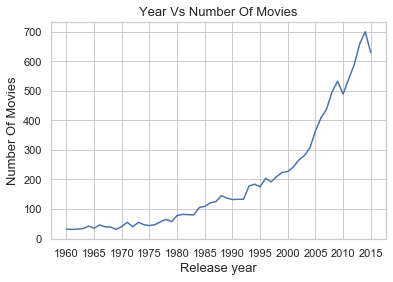

In [231]:
# making group for each year and counting the number of movies
data=movies_data.groupby('release_year').count()['id']
print(data.tail())

#making group of the data according release year and counting the total number of movies
movies_data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#setting the figure size and labels
sns.set(rc={'figure.figsize':(19,6)})
plt.title("Year Vs Number Of Movies",fontsize = 13)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style("whitegrid")

**Year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).**

###  Which Movie Has The Highest Or Lowest Profit?

In [232]:
#calculating Profit for each movie
#adding a new column in the dataframe 'Profit'
movies_data['Profit'] = movies_data['revenue'] - movies_data['budget']

In [233]:
#using the function 'idmin' to find the index of lowest profit movie.
#using the function 'idmax' to find the index of Highest profit movie.

def find_minmax(x):
    min_index = movies_data[x].idxmin()
    high_index = movies_data[x].idxmax()
    high = pd.DataFrame(movies_data.loc[high_index,:])
    low = pd.DataFrame(movies_data.loc[min_index,:])
    
    print("Movie Which Has Highest "+ x + " : ",movies_data['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",movies_data['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The first column shows the highest profit made by a movie and second column shows the highest in loss movie in this dataset.

>**Avatar** earns the highest profit in all, making over 2.5B in profit in this dataset. And the most in loss movie in this dataset is **The Warrior's Way**. Going in loss by more than 400M.


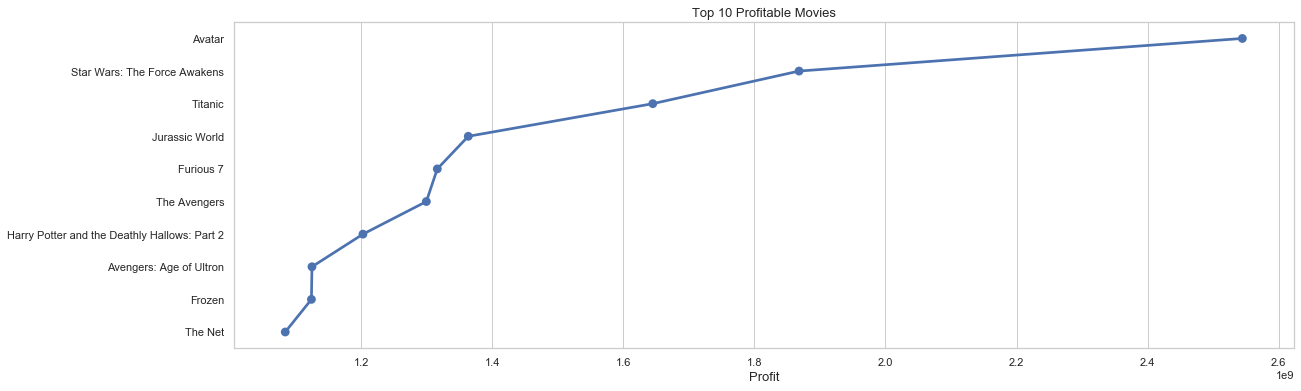

In [234]:
# Making a plot which contain top 10 movies who earns highest profit.
# sorting the 'Profit' column in decending order
info = pd.DataFrame(movies_data['Profit'].sort_values(ascending = False))
info['original_title'] = movies_data['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#making a plot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setting the figure size
sns.set(rc={'figure.figsize':(19,6)})
#setting the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 13)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("whitegrid")

### Movie with Highest And Lowest Budget?

In [235]:
#finding the movie with highest and lowest budget.
#using 'find_minmax'

movies_data['budget'] = movies_data['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


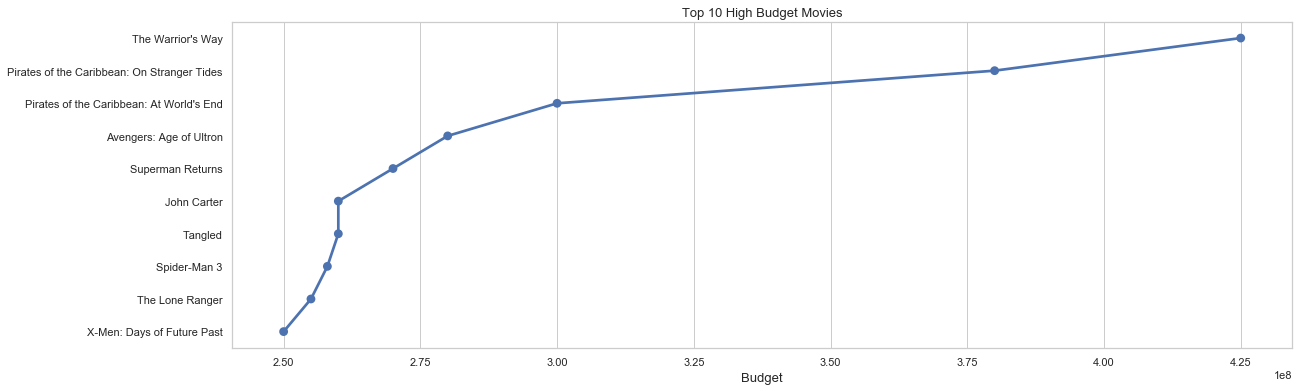

In [236]:
#making a plot which contain top 10 highest budget movies.
#sorting the 'budget' column in decending order
info = pd.DataFrame(movies_data['budget'].sort_values(ascending = False))
info['original_title'] = movies_data['original_title']
data = list(map(str,(info['original_title'])))

#extracting the top 10 budget movies
x = list(data[:10])
y = list(info['budget'][:10])

#plotting the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(19,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 13)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("whitegrid")

### Movie with Largest And Lowest Earned Revenue?

In [237]:
#finding the movie with highest and lowest earned revenue
#using 'find_minmax' function
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


> The first column shows the highest revenue made by a movie and second column shows the lowest revenue movie in this dataset. 

>**Avatar** movie made the highest revenue in all, making over 2.78B revenue in this dataset. Movie which made lowest revenue is **Wild Card**.

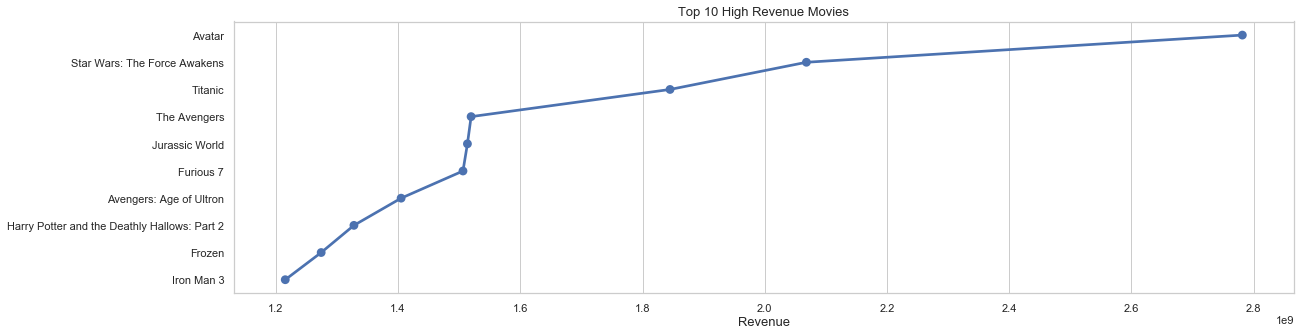

In [238]:
#top 10 movies which made highest revenue.
#sorting the 'revenue' column in decending order
info = pd.DataFrame(movies_data['revenue'].sort_values(ascending = False))
info['original_title'] = movies_data['original_title']
data = list(map(str,(info['original_title'])))

#extracting the top 10 movies with high revenue data
x = list(data[:10])
y = list(info['revenue'][:10])

#making the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(19,6)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 13)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("whitegrid")

### Movie with Longest And Shortest Rintime?

In [239]:
#finding the movie with longest and shortest runtime.
#using 'find_minmax' function

movies_data['runtime'] = movies_data['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,0
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,0
runtime,900,2
genres,Documentary,Animation


>The first column shows the runtime of the highest and second the lowest with column names as the index number.

> Runtime of 900 min, that's approx 15 hrs! **The Story of Film: An Odyssey** movie has the highest runtime. This movie contain 6 or 7 parts that's why it is so long.

> The movie with shortest runtime is **Fresh Guacamole**, runtime of just 2 min.

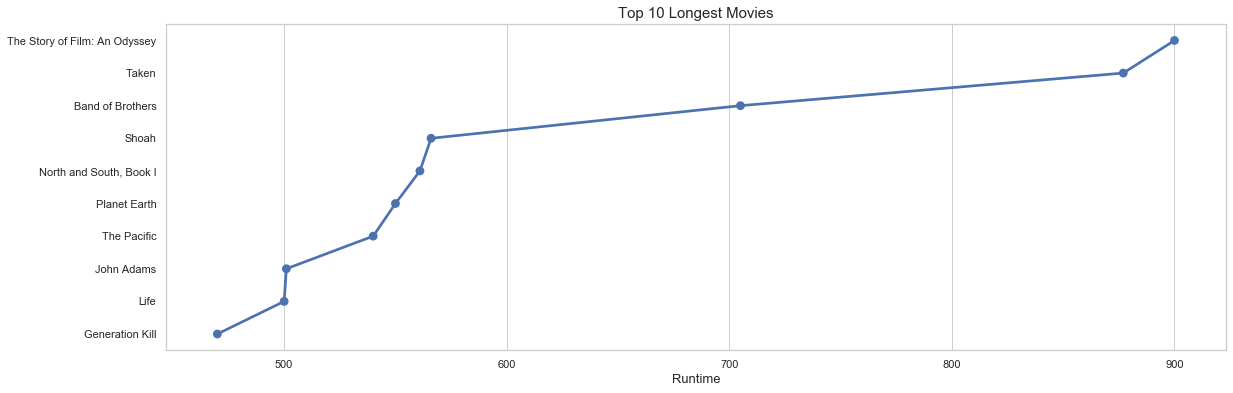

In [240]:
#top 10 Movies With Longest runtime
#sorting the 'runtime' column in decending order
info = pd.DataFrame(movies_data['runtime'].sort_values(ascending = False))
info['original_title'] = movies_data['original_title']
data = list(map(str,(info['original_title'])))

#extracting the top 10 longest duraton movies
x = list(data[:10])
y = list(info['runtime'][:10])

#making the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(19,6)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("whitegrid")

### Movie with Highest And Lowest Votes?

In [241]:
#finding the movie with most and least votes.
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


> The first column contain the movie with highest votes and second column contain the movie with lowest votes.

> **The Story of Film: An Odyssey** has the maximum rating (92%) and movie with lowest user ratings is **Transmorphers** with 15% user ratings.

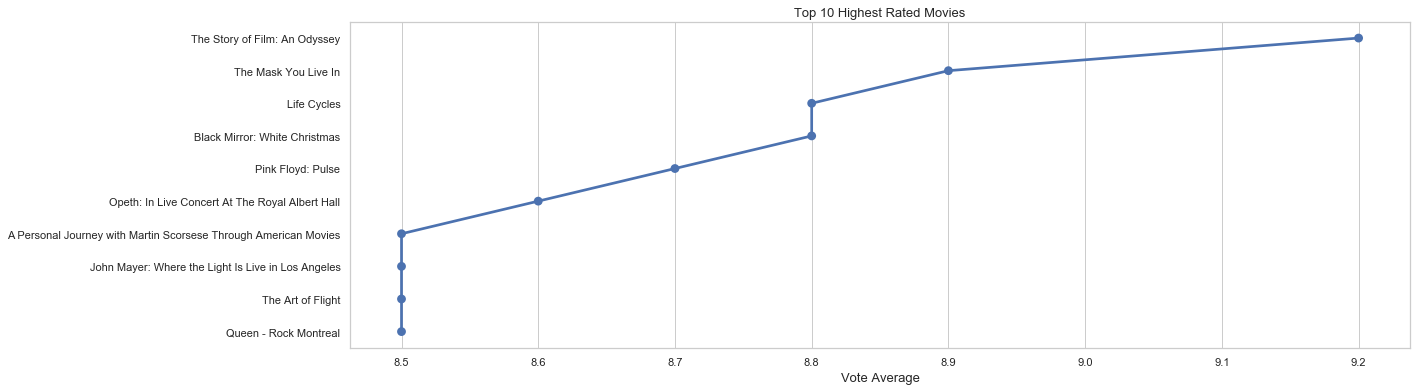

In [242]:
#top 10 highets rated movies.
#sorting the 'vote_average' column in decending order
info = pd.DataFrame(movies_data['vote_average'].sort_values(ascending = False))
info['original_title'] = movies_data['original_title']
data = list(map(str,(info['original_title'])))

#extracting the top 10 highly rated movies
x = list(data[:10])
y = list(info['vote_average'][:10])

#making the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(19,6)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 13)
ax.set_xlabel("Vote Average",fontsize = 13)
sns.set_style("whitegrid")

### Which Year Has The Highest Profit Rate?

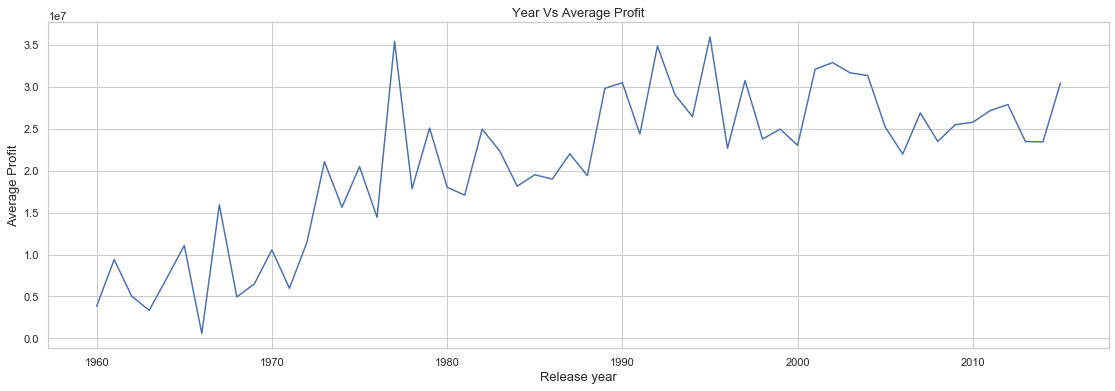

In [243]:
#taking the average of profit made by movies in each year
#making the group of the data according to their release_year and find the mean profit and plot.
movies_data.groupby('release_year')['Profit'].mean().plot()

#setting up the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 13)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setting up the figure size.
sns.set(rc={'figure.figsize':(19,6)})
sns.set_style("whitegrid")

> **According to the plot year 2002-03 he most profitable years And the profit was very low between the years 1960 and 1970.** 

###  Which length movies most liked by the audiences according to their popularity?

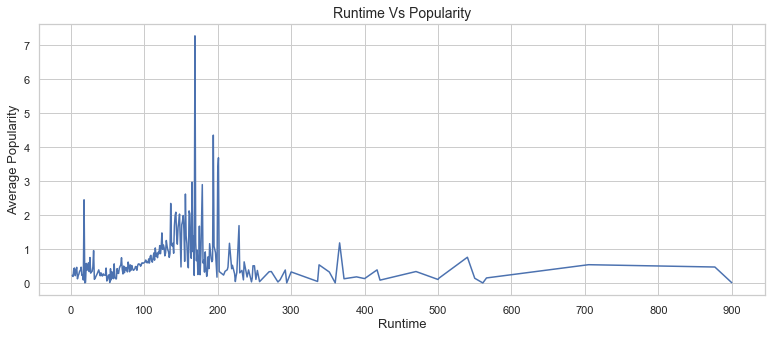

In [244]:
#using groupby function and group the data according to their runtime.
#making a plot using their popularity and find which length movies are most popular.

#making the group of the data according to their runtime and find the mean popularity related to this
movies_data.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setting the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setting the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setting the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

> **According to the plot, the movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**  

### Average Runtime Of Movies From Year To Year?

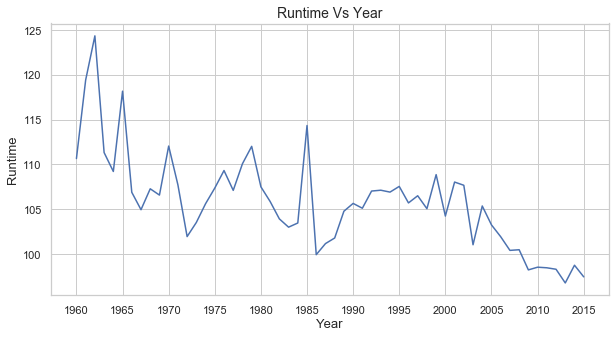

In [245]:
#making the group of the data according to their release_year and find the mean  related to this
movies_data.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setting up the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setting up the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setting up the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

> **According to the plot duration is decreasing year to year and it's TRUE. The average runtime duraion of the movies are around 100 Minutes.** 

### How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?

Correlation Between Revenue And Budget :  0.6885561524636783


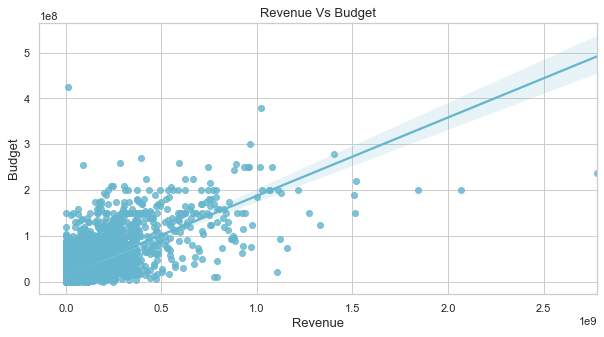

In [246]:
ax = sns.regplot(x=movies_data['revenue'], y=movies_data['budget'],color='c')

#setting the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=13)
ax.set_ylabel("Budget",fontsize=13)

#setting the figure size
sns.set(rc={'figure.figsize':(19,6)})
sns.set_style("whitegrid")

#finding the correlation between them
movies_data['budget'] = movies_data['budget'].replace(0,np.NAN)
movies_data['revenue'] = movies_data['revenue'].replace(0,np.NAN)
movies_data['Profit'] = movies_data['Profit'].replace(0,np.NAN)

data_corr = movies_data.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Release Year And Vote Average :  -0.11757558609467972


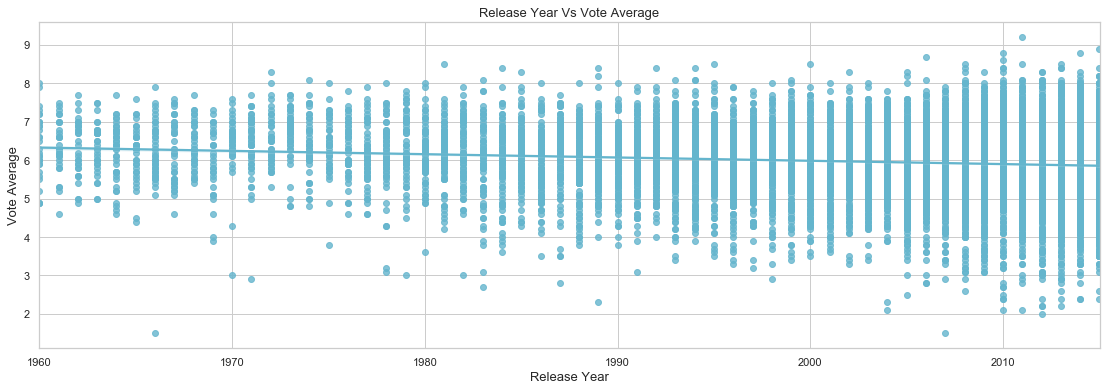

In [247]:
ax = sns.regplot(x=movies_data['release_year'], y=movies_data['vote_average'],color='c')

#setting up the title and the labels of the scatter plot.
ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=13)
ax.set_ylabel("Vote Average",fontsize=13)

#setting up the figure size and print the correlation between them.
sns.set(rc={'figure.figsize':(19,6)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

Correlation Between Popularity And Profit :  0.6159162443059026


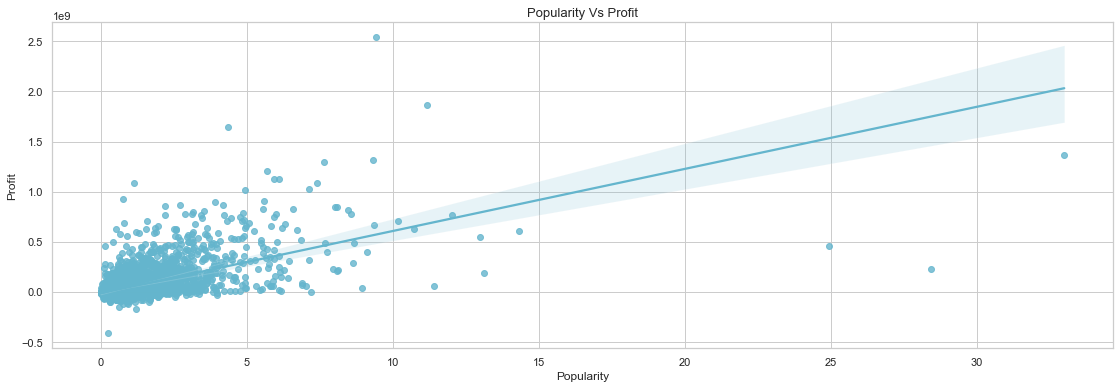

In [248]:
ax = sns.regplot(x=movies_data['popularity'],y=movies_data['Profit'],color='c')

#setting up the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setting up the figure size.
sns.set(rc={'figure.figsize':(19,6)})
sns.set_style("whitegrid")

#finding the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])


> **These Are Estimated Values :**
- **1. Budget vs Revenue  :**  Budget and revenue both have **positive correlation(0.68)** between them. Means there is a good possibility that movies with higher investments result in better revenues.
- **2. Profit Vs Budget  : **  Profit And Budget both have **positive correlation(0.53)** between them. Means there is a good possibility that movies with higher investments result in better Profit.
- **3. Release Year Vs Vote Average : ** Release year and vote Average have **negative correlation(-0.11)**. Means that movie ratings(vote average) does not depends on the release year.
- **4. Popularity Vs Profit : ** Popularity and profit have **positive correlation(0.61)**. It means that movie with high popularity tends to earn high profit.

### Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

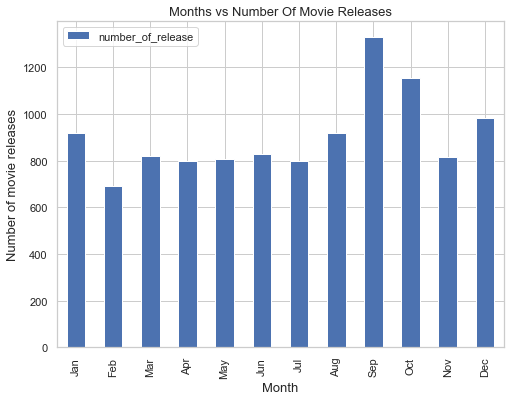

In [249]:
#extracting the month number from the release date.
month_release = movies_data['release_date'].dt.month

#counting the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#changing the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plotting the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#setting the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 13)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("whitegrid")


>**According to the plot we can conclude that there are higher number of release in september and october month.**

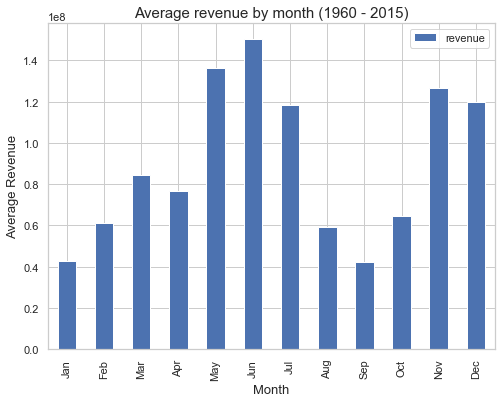

In [250]:
month_release = pd.DataFrame(month_release)

#changing the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#adding a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = movies_data['revenue']

#making the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#making the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setting up the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("whitegrid")

> **According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.**

### Which genres are most popular from year to year?

In [251]:
#calculating the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)

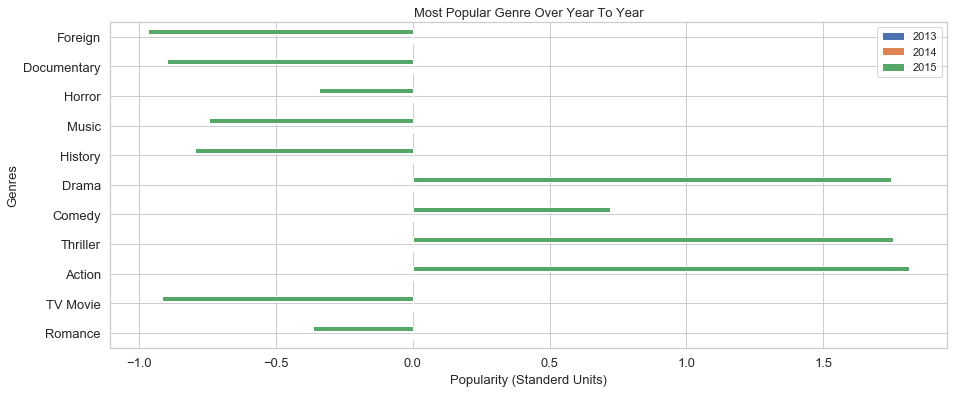

In [252]:
#plotting the barh plot of the standardised data.
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setting up the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=13)
plt.xlabel("Popularity (Standerd Units)",fontsize=13)
plt.ylabel("Genres",fontsize = 13)
sns.set_style("whitegrid")

### What Kind Of Properties Are Associated With Movies With High Revenue?

In [253]:
info = pd.DataFrame(movies_data['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = movies_data[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
1386,2.781506e+09,19995,9.432768,237000000.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2.068178e+09,140607,11.173104,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1.845034e+09,597,4.355219,200000000.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,7.3,1997


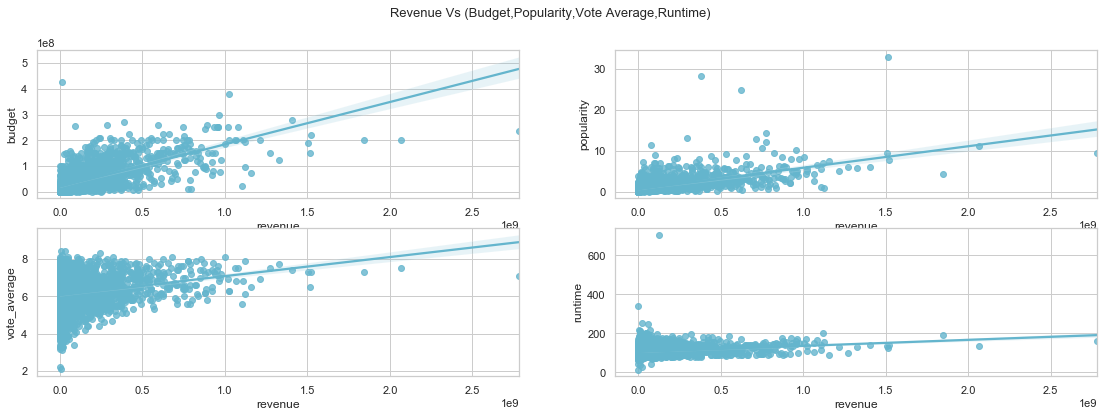

In [254]:
fig, axes = plt.subplots(2,2,figsize = (19,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=13)

sns.regplot(x=movies_data['revenue'], y=movies_data['budget'],color='c',ax=axes[0][0])
sns.regplot(x=movies_data['revenue'], y=movies_data['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=movies_data['revenue'], y=movies_data['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=movies_data['revenue'], y=movies_data['runtime'],color='c',ax=axes[1][1])

sns.set_style("whitegrid")

In [255]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

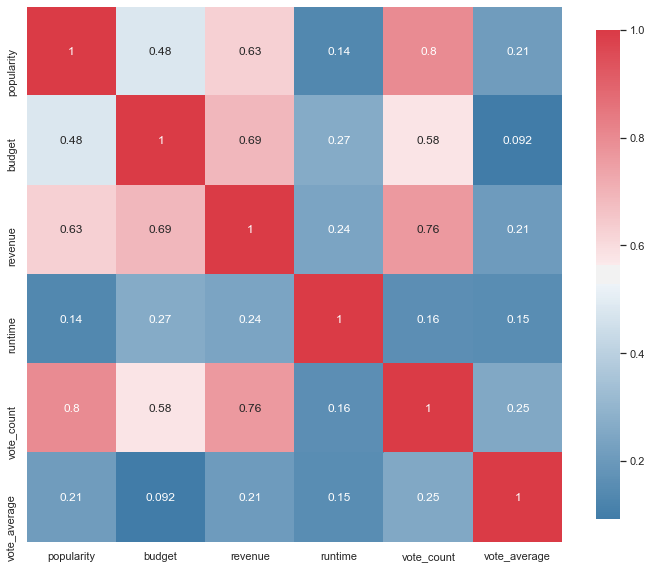

In [256]:
plot_correlation_map(movies_data[['popularity','budget','revenue','runtime','vote_count','vote_average']])

**Budget vs Revenue**

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.
- Correlation = 0.69

**Popularity vs Revenue**

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.
- Correlation = 0.63

**Vote Average vs Revenue**

The correlation between revenue and vote average is **0.21**. So vote average is not highly related to the revenue.

**Runtime vs Revenue**

The correlation between revenue and runtime is **0.24**. So runtime is not highly related to the revenue.

<a id='conclusions'></a>
## Conclusions

> **Observations from above analysis are :**
- Drama, Comedy, Thriller and Action are four most-made genres. 
- Maximum Number  Of Movies Release In year 2014.
- 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
- Short or Long duration movies are more popular than long duration movies.
- Average runtime of the movies are decreasing year by year.
- May, june, november and december are most popular month for releasing movies, if you want to earn more profit.
- Revenue is directly connected to the budget.
- Movies with higher budgets have shown a corresponding increase in the revenues.